In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from TDE import *

## Tpeak v.s. other parameters

In [3]:
e_cri_1 = .9825
e_cri_5 = .93166

In [4]:
def P2Ecc(P, M=1 * u.Msun, R=1 * u.Rsun, beta=1):
    return 1 - (4 * np.pi**2 / P**2 / G / M)**(1 / 3) * R / beta

In [5]:
from astropy.table import Table

16


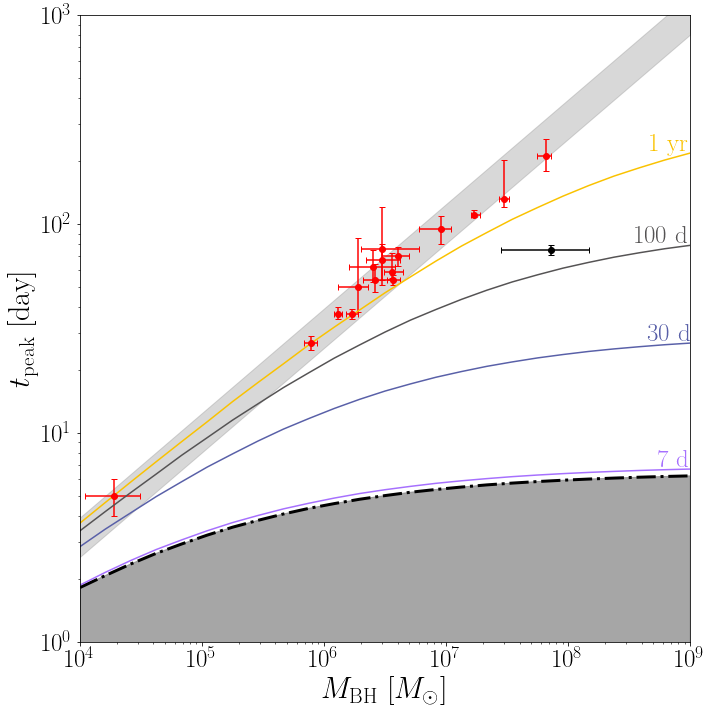

In [6]:
#ASASSN14ko
ASMh = 10**7.86
ASMheup = 10**(7.86 + 0.31) - ASMh
ASMhelo = ASMh - 10**(7.86 - 0.41)

ASMh_fit = 10**7.81
ASMheup_fit = 10**(7.81 + 0.17) - ASMh
ASMhelo_fit = ASMh - 10**(7.81 - 0.29)

AStp = 75.3
AStpeup = 4.0
AStpelo = 4.0

AStp2 = 65.6
AStpeup2 = 7.7
AStpelo2 = 7.7

AStp3 = 36.4
AStpeup3 = 6.2
AStpelo3 = 6.2

M_tpeak = Table.read('M_tpeak.csv', comment='#')
print(len(M_tpeak))
Mherr = np.array([-M_tpeak['Mhe-'], M_tpeak['Mhe+']]) * 1e6
tperr = np.array([-M_tpeak['tpe-'], M_tpeak['tpe+']])

plt.figure(figsize=(10, 10))

plt.errorbar(M_tpeak['Mh'] * 1e6,
             M_tpeak['tp'],
             xerr=Mherr,
             yerr=tperr,
             fmt='o',
             capsize=3,
             color='r')

plt.errorbar(ASMh,
             AStp,
             xerr=[[ASMhelo], [ASMheup]],
             yerr=[[AStpelo], [AStpeup]],
             fmt='o',
             capsize=3,
             color='k')

q_range = np.logspace(4, 9, 25)
F = os.listdir('../../STARS_library/retrieval/m1.0_t0.445/')
tde1 = [TDE(q=q, file='1.000.dat') for q in q_range]
tde4 = [TDE(q=q, file='4.000.dat', beta=4) for q in q_range]
plt.fill_between(q_range,
                 y1=[tde.Tpeak for tde in tde1],
                 y2=[tde.Tpeak for tde in tde4],
                 color='grey',
                 alpha=0.3)
tde_cri = [TDE(q=q, Ecc=e_cri_5, file='1.000.dat') for q in q_range]
plt.loglog(q_range, [tde.Tpeak for tde in tde_cri],
           color='k',
           linestyle='-.',
           linewidth=3)
plt.fill_between(q_range, [tde.Tpeak for tde in tde_cri],
                 color='grey',
                 alpha=0.7)

P_range = np.array([7, 30, 100, 365.25]) * u.day
Ecc = P2Ecc(P_range)

cmap = cm.get_cmap('Haze', 4)

S = [None, None, None, '$1\ \mathrm{yr}$']

for level, ecc in enumerate(Ecc):
    tde_temp = [TDE(q=q, Ecc=ecc, file='1.000.dat') for q in q_range]
    plt.loglog(q_range, [tde.Tpeak for tde in tde_temp], color=cmap(level))
    if S[level] == None:
        s = '${:.0f}$'.format(P_range[level].v) + '$\ \mathrm{d}$'
    else:
        s = S[level]
    plt.text(x=q_range[-1],
             y=tde_temp[-1].Tpeak * 1.03,
             s=s,
             fontsize=25,
             ha='right',
             color=cmap(level))
    '''Tpeak_ratio_analyt_temp = ((1 - ecc) * q_range**(1 / 3) / 2 + 1)**(-3 / 2)
    plt.loglog(q_range, [tde.Tpeak for tde in tde0] * Tpeak_ratio_analyt_temp,
               color=cmap(level),
               linestyle=':')'''
plt.xlim(1e4, 1e9)
plt.ylim(1e0, 1e3)
plt.ylabel('$t_\mathrm{peak}\ \mathrm{[day]}$', fontsize=30)
plt.xlabel('$M_\mathrm{BH}\ [M_\odot]$', fontsize=30)
plt.gca().tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('Tp_q.pdf', bbox_inches='tight')

## Mdot v.s. t

In [7]:
#P = 114 day, beta = 1, Ecc?
Ecc114 = 1 - ((2 * np.pi / 114 / u.day)**2 / G / u.Msun)**(1 / 3) * u.Rsun
Ecc114

unyt_quantity(0.98989573, '(dimensionless)')

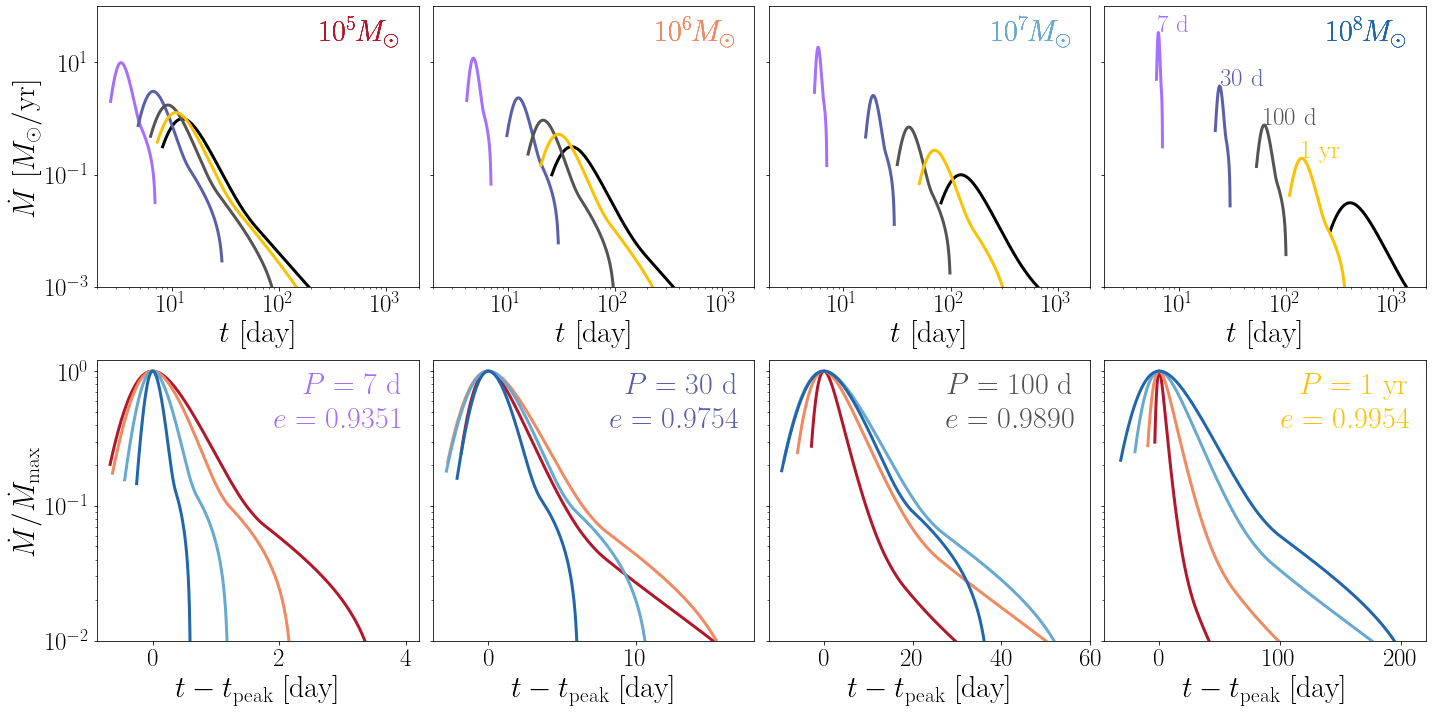

In [8]:
f, ax = plt.subplots(2, 4, figsize=(20, 10), sharey='row')

Q = [1e5, 1e6, 1e7, 1e8]

P_range = np.array([7, 30, 100, 365.25]) * u.day
Ecc = P2Ecc(P_range)
cmap_P = cm.get_cmap('Haze', 4)
cmap_M = ['#b2182b', '#ef8a62', '#67a9cf',
          '#2166ac']  #cm.get_cmap('RdYlBu_r', 4)

S = [None, None, None, '1\ \mathrm{yr}']
for k, (a, q) in enumerate(zip(ax[0], Q)):
    tde0 = TDE(Ecc=1, beta=1.0, file='1.000.dat', q=q)
    Tpeak0 = tde0.Tpeak
    dmdt0 = tde0.dmdt.max()
    dmdt0 = 1
    a.loglog(tde0.T, tde0.dmdt / dmdt0, color='k', linewidth=3)
    '''tde_cri = TDE(Ecc=e_cri_5, beta=1.0, file='1.000.dat', q=q)
    a.loglog(tde_cri.T / Tpeak0,
             tde_cri.dmdt / dmdt0,
             color='k',
             linestyle='--',
             linewidth=3)'''

    for level, ecc in enumerate(Ecc):
        tde = TDE(Ecc=ecc, beta=1.0, file='1.000.dat', q=q)
        a.loglog(tde.T, tde.dmdt / dmdt0, color=cmap_P(level), linewidth=3)
        if S[level] == None:
            s = '{:.0f}'.format(P_range[level].v) + '\ \mathrm{d}'
        else:
            s = S[level]
        a.text(x=0.95,
               y=0.91,
               s=r'$10^{:.0f}M_\odot$'.format(np.log10(q)),
               fontsize=30,
               ha='right',
               va='center',
               color=cmap_M[k],
               transform=a.transAxes)
        if k == 3:
            a.text(x=tde.T[np.argmax(tde.dmdt)],
                   y=tde.dmdt.max() / dmdt0 * 1.05,
                   s='${}$'.format(s),
                   color=cmap_P(level),
                   fontsize=25)

    a.tick_params(labelsize=25)
    a.set_xlabel('$t\ [\mathrm{day}]$', fontsize=30)
    a.set_xlim(2e0, 2e3)
    a.set_ylim(1e-3, 1e2)
    #a.set_xticks([1e1, 1e2, 1e3])
    #a.set_yticks([1e-2, 1e0, 1e2])

ax[0, 0].set_ylabel('$\dot M\ [M_\odot/\mathrm{yr}]$', fontsize=30)

for k, (a, ecc) in enumerate(zip(ax[1], Ecc)):
    for level, q in enumerate(Q):
        tde = TDE(Ecc=ecc, beta=1.0, file='1.000.dat', q=q)
        a.plot(tde.T - tde.Tpeak,
               tde.dmdt / tde.dmdt.max(),
               color=cmap_M[level],
               linewidth=3)
    if S[k] == None:
        s = '{:.0f}'.format(P_range[k].v) + '\ \mathrm{d}'
    else:
        s = S[k]
    s = '$P={}$'.format(s)
    a.text(x=0.95,
           y=0.91,
           s=s,
           fontsize=30,
           ha='right',
           va='center',
           color=cmap_P(k),
           transform=a.transAxes)
    a.text(x=0.95,
           y=0.79,
           s='$e={:.4f}$'.format(ecc.v),
           fontsize=30,
           ha='right',
           va='center',
           color=cmap_P(k),
           transform=a.transAxes)

    a.tick_params(labelsize=25)
    a.set_xlabel('$t-t_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
    a.set_ylim(1e-2, 1.2e0)

ax[1, 0].set_ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
ax[1, 0].set_xlim(-0.875, 4.2)
ax[1, 1].set_xlim(-3.75, 18)
ax[1, 2].set_xlim(-12.5, 60)
ax[1, 3].set_xlim(-45.3, 220)
plt.yscale('log')

f.tight_layout()

#plt.yticks([1e-2, 1e0, 1e2])
plt.savefig('Mdot_T.pdf', bbox_inches='tight')

## STARS library

In [9]:
10**7.86, 10**(7.86+0.31*3), 10**(7.86-0.41*3)

(72443596.00749905, 616595001.8614835, 4265795.188015934)

In [10]:
TESS = np.loadtxt('../mosfit_bin/TESS_mag.dat')
TESS = TESS[TESS[:, 0] > 2458429]
TESS = TESS[TESS[:, 1] > 0]

TESS = data_binning(TESS, 0.33333)
TESS_bin = data_binning(TESS, 1)

tpeak = TESS_bin[np.argmin(TESS_bin[:, 1]), 0] + 1
TESS_tscale = (TESS[:, 0] - tpeak)# / (tpeak - TESS[0, 0])# / 1.2
TESS_dmdtscale = 10**(-0.4 * (TESS[:, 1] - TESS[:, 1].min()))
TESS_dmdterrscale = TESS_dmdtscale * (1 - 10**(-0.4 * TESS[:, 2]))

ASg = np.loadtxt('../mosfit_bin/ASg_mag.dat')
ASg = ASg[ASg[:, 0] > 2458429]
ASg = ASg[ASg[:, 1] > 0]

#tpeak = ASg[np.argmin(ASg[:, 1]), 0] +2#ASg[3, 0]
ASg_tscale = (ASg[:, 0] - tpeak)# / (tpeak - ASg[0, 0]) / 2
ASg_dmdtscale = 10**(-0.4 * (ASg[:, 1] - ASg[:, 1].min()))
ASg_dmdterrscale = ASg_dmdtscale * (1 - 10**(-0.4 * ASg[:, 2]))

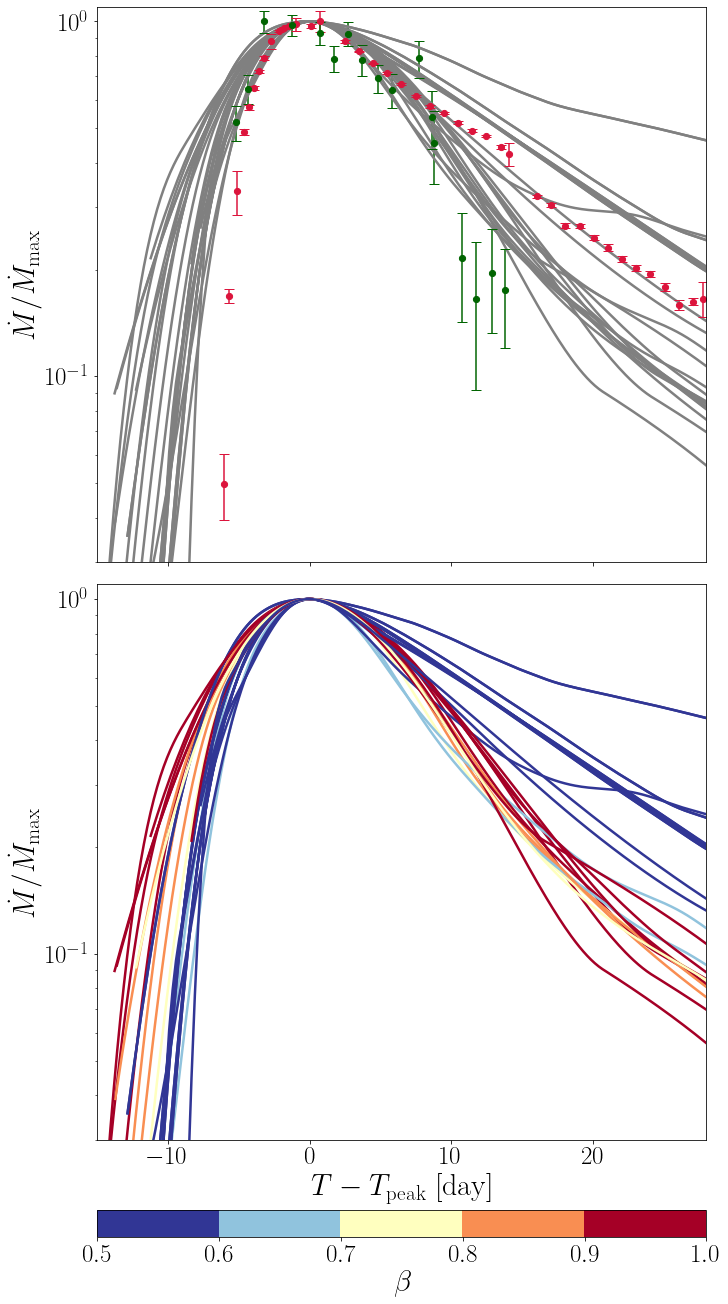

In [27]:
fig, ax = plt.subplots(2,
                       1,
                       figsize=(10, 18),
                       sharey=True,
                       sharex=True,
                       constrained_layout=True)

Age = ['0.0', '0.445', '1.0']
Input = '../../STARS_library/input/'

cmap = cm.get_cmap('RdYlBu_r', 5)
betac = 1.0
beta0 = 0.5
betamax = 0
for Dir in os.listdir(Input):
    for f in os.listdir(Input + Dir):
        beta = float(f[:-4])
        if beta <= betac:
            ms, rs, rhoc_rho = mesa_param(Dir)
            tde = TDE(Ecc=P2Ecc(114.2 * u.day, M=ms, R=rs, beta=beta),
                      beta=beta,
                      file=f,
                      DIR=Input + Dir + '/',
                      ms=ms,
                      rs=rs,
                      q=10**7.86)
            if tde.dM_Ms > 0.1:
                continue
            if tde.dmde[-1] == tde.dmde.max():
                continue

            ax[0].plot(tde.T - tde.Tpeak,
                       tde.dmdt / tde.dmdt.max(),
                       color='grey',
                       linewidth=2.5)
            ax[1].plot(
                tde.T - tde.Tpeak,
                tde.dmdt / tde.dmdt.max(),
                color=cmap((beta - beta0) / (betac - beta0)),
                #alpha=0.7,
                linewidth=2.5)
ax[0].errorbar(TESS_tscale,
               TESS_dmdtscale,
               yerr=TESS_dmdterrscale,
               fmt='o',
               capsize=5,
               ms=6.18,
               color='crimson',
               label='$\mathrm{TESS}$')

ax[0].errorbar(ASg_tscale,
               ASg_dmdtscale,
               yerr=ASg_dmdterrscale,
               fmt='o',
               capsize=5,
               ms=6.18,
               color='darkgreen',
               label='$\mathrm{ASASSN}\ g$')

sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=beta0, vmax=betac))
cbar = plt.colorbar(sm, aspect=40, pad=0, ax=ax, location="bottom")
cbar.ax.tick_params(labelsize=25)
cbar.set_ticks(np.linspace(beta0, betac, 6))
cbar.set_label(r'$\beta$', fontsize=30)

ax[1].set_xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
for a in ax:
    a.set_ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
    a.set_xticks([-10, 0, 10, 20])
    a.tick_params(labelsize=25)
#fig.tight_layout()
plt.xlim(-15, 28)
plt.ylim(3e-2, 1.1e0)
#plt.legend(prop={'size': 25})
#plt.xscale('log')
plt.yscale('log')
plt.savefig('Mdot_T_STARS.pdf', bbox_inches='tight')

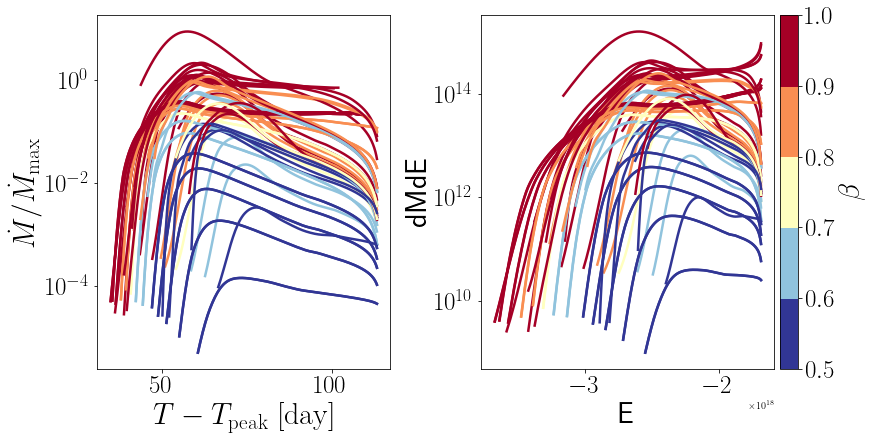

In [12]:
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 6),
                       constrained_layout=True)

Age = ['0.0', '0.445', '1.0']
Input = '../../STARS_library/input/'

cmap = cm.get_cmap('RdYlBu_r', 5)
betac = 1.0
beta0 = 0.5
betamax = 0
for Dir in os.listdir(Input):
    for f in os.listdir(Input + Dir):
        beta = float(f[:-4])
        if beta0 <= beta <= betac:
            ms, rs, rhoc_rho = mesa_param(Dir)
            tde = TDE(Ecc=P2Ecc(114.2 * u.day, M=ms, R=rs, beta=beta),
                      beta=beta,
                      file=f,
                      DIR=Input + Dir + '/',
                      ms=ms,
                      rs=rs,
                      q=10**7.86)

            ax[0].plot(
                tde.T,
                tde.dmdt,
                color=cmap((beta - beta0) / (betac - beta0)),
                #alpha=0.7,
                linewidth=2.5)
            ax[1].plot(
                tde.E,
                tde.dmde,
                color=cmap((beta - beta0) / (betac - beta0)),
                #alpha=0.7,
                linewidth=2.5)
        ax[0].set_yscale('log')
        ax[1].set_yscale('log')
        #ax[0].set_ylim(1e-2, 1.1e0)
        
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=beta0, vmax=betac))
cbar = plt.colorbar(sm, aspect=40, pad=0, ax=ax)
cbar.ax.tick_params(labelsize=25)
cbar.set_ticks(np.linspace(beta0, betac, 6))
cbar.set_label(r'$\beta$', fontsize=30)

ax[0].set_ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
ax[0].set_xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
ax[1].set_ylabel('dMdE', fontsize=30)
ax[1].set_xlabel('E', fontsize=30)
for a in ax:
    a.tick_params(labelsize=25)
#fig.tight_layout()
#plt.legend(prop={'size': 25})
#plt.xscale('log')

<ErrorbarContainer object of 3 artists>

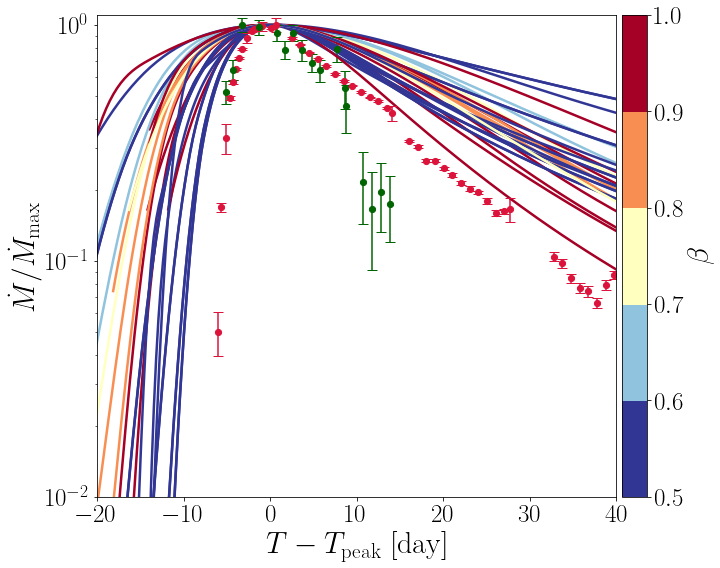

In [13]:
plt.figure(figsize=(10, 8))

Age = ['0.0', '0.445', '1.0']
Input = '../../STARS_library/input/'

cmap = cm.get_cmap('RdYlBu_r', 5)
betac = 1.0
beta0 = 0.5
for Dir in os.listdir(Input):
    for f in os.listdir(Input + Dir):
        beta = float(f[:-4])
        if beta <= betac:
            ms, rs, rhoc_rho = mesa_param(Dir)
            tde = TDE(Ecc=1,
                      beta=beta,
                      file=f,
                      DIR=Input + Dir + '/',
                      ms=ms,
                      rs=rs,
                      q=10**6)
            if tde.dM_Ms > 0.1:
                continue
            plt.plot(
                tde.T - tde.Tpeak,
                tde.dmdt / tde.dmdt.max(),
                color=cmap((beta - beta0) / (betac - beta0)),
                #alpha=0.7,
                linewidth=2.5)
    '''plt.text(x=tde.T[np.argmax(tde.dmdt)] / Tpeak0,
             y=tde.dmdt.max() / dmdt0 * 1.05,
             s=s,
             fontsize=25,
             color=cmap(level))'''

sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=beta0, vmax=betac))
cbar = plt.colorbar(sm, pad=0.01)
cbar.ax.tick_params(labelsize=25)
cbar.set_ticks(np.linspace(beta0, betac, 6))
cbar.set_label(r'$\beta$', fontsize=30)

plt.ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
plt.xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
plt.gca().tick_params(labelsize=25)
plt.tight_layout()
plt.xlim(-20, 40)
plt.ylim(1e-2, 1.1e0)
#plt.legend(prop={'size': 25})
#plt.xscale('log')
plt.yscale('log')

plt.errorbar(TESS_tscale,
             TESS_dmdtscale,
             yerr=TESS_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='crimson',
             label='$\mathrm{TESS}$')

plt.errorbar(ASg_tscale,
             ASg_dmdtscale,
             yerr=ASg_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='darkgreen',
             label='$\mathrm{ASASSN}\ g$')
#plt.savefig('/Users/chang/Desktop/Mdot_T_sun.pdf', bbox_inches='tight')

In [14]:
10**7.86, 10**(7.86-0.41), 10**(7.86+0.31)

(72443596.00749905, 28183829.31264455, 147910838.8168207)

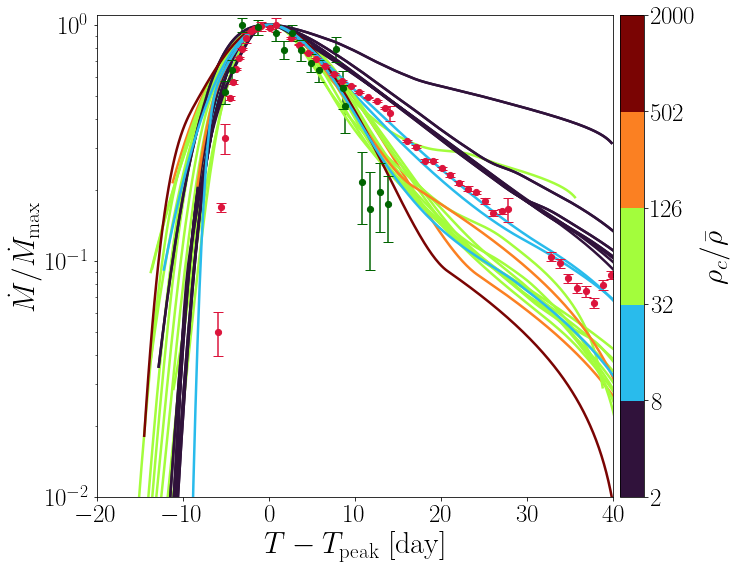

In [15]:
plt.figure(figsize=(10, 8))

Input = '../../STARS_library/input/'

cmap = cm.get_cmap('turbo', 5)
logMc = 0
logM0 = -1
betac = 1.0
beta0 = 0.6
for Dir in os.listdir(Input):
    if Dir[4] == '_':
        Ms = float(Dir[1:4])
    else:
        Ms = float(Dir[1:5])
    for f in os.listdir(Input + Dir):
        beta = float(f[:-4])
        if beta <= betac:
            ms, rs, rhoc_rho = mesa_param(Dir)
            tde = TDE(Ecc=P2Ecc(114.2 * u.day, M=ms, R=rs, beta=beta),
                      beta=beta,
                      file=f,
                      DIR=Input + Dir + '/',
                      ms=ms,
                      rs=rs,
                      q=10**7.86)
            if tde.dM_Ms > 0.1:
                continue
            plt.plot(tde.T - tde.Tpeak,
                     tde.dmdt / tde.dmdt.max(),
                     color=cmap(np.log10(rhoc_rho / 2) / np.log10(1000)),
                     linewidth=2.5)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, pad=0.01)
cbar.ax.tick_params(labelsize=25)
cbar.set_ticks(np.linspace(0, 1, 6))
cbar.set_label(r'$\rho_c/\bar\rho$', fontsize=30)

plt.ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
plt.xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
plt.gca().tick_params(labelsize=25)
plt.tight_layout()
plt.xlim(-20, 40)
plt.ylim(1e-2, 1.1e0)
#plt.legend(prop={'size': 25})
#plt.xscale('log')
plt.yscale('log')

plt.errorbar(TESS_tscale,
             TESS_dmdtscale,
             yerr=TESS_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='crimson',
             label='$\mathrm{TESS}$')

plt.errorbar(ASg_tscale,
             ASg_dmdtscale,
             yerr=ASg_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='darkgreen',
             label='$\mathrm{ASASSN}\ g$')

cbar.ax.set_yticklabels(
    ['${:.0f}$'.format(i) for i in 2 * 1000**(np.arange(6) / 5)], fontsize=25)
#plt.savefig('/Users/chang/Desktop/Mdot_T_sun.pdf', bbox_inches='tight')
plt.show()

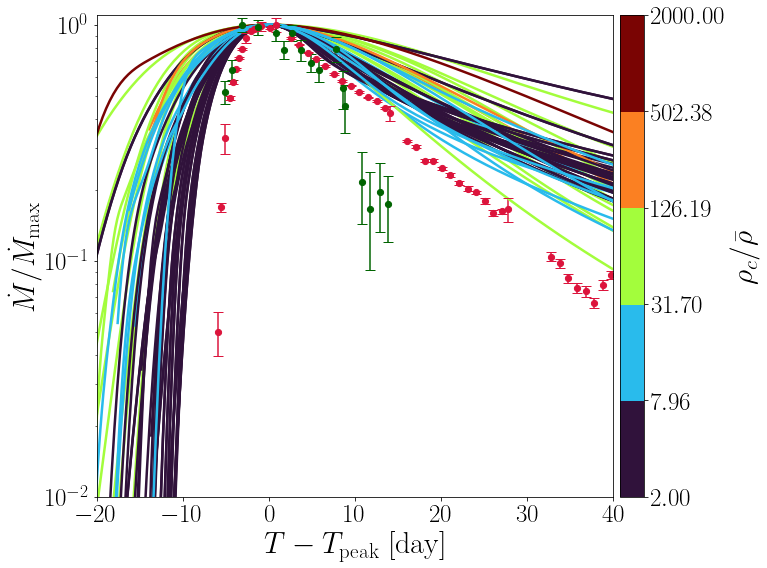

In [16]:
plt.figure(figsize=(10, 8))

Input = '../../STARS_library/input/'

cmap = cm.get_cmap('turbo', 5)
logMc = 1
logM0 = -1
for Dir in os.listdir(Input):
    if Dir[4] == '_':
        Ms = float(Dir[1:4])
    else:
        Ms = float(Dir[1:5])
    for f in os.listdir(Input + Dir):
        beta = float(f[:-4])
        if beta <= betac:
            ms, rs, rhoc_rho = mesa_param(Dir)
            tde = TDE(Ecc=1,
                      beta=beta,
                      file=f,
                      DIR=Input + Dir + '/',
                      ms=ms,
                      rs=rs,
                      q=10**6)
            plt.plot(tde.T - tde.Tpeak,
                     tde.dmdt / tde.dmdt.max(),
                     color=cmap(np.log10(rhoc_rho / 2) / np.log10(1000)),
                     linewidth=2.5)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, pad=0.01)
cbar.ax.tick_params(labelsize=25)
cbar.set_ticks(np.linspace(0, 1, 6))
cbar.set_label(r'$\rho_c/\bar\rho$', fontsize=30)

plt.ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
plt.xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
plt.gca().tick_params(labelsize=25)
plt.tight_layout()
plt.xlim(-20, 40)
plt.ylim(1e-2, 1.1e0)
#plt.legend(prop={'size': 25})
#plt.xscale('log')
plt.yscale('log')

plt.errorbar(TESS_tscale,
             TESS_dmdtscale,
             yerr=TESS_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='crimson',
             label='$\mathrm{TESS}$')

plt.errorbar(ASg_tscale,
             ASg_dmdtscale,
             yerr=ASg_dmdterrscale,
             fmt='o',
             capsize=5,
             ms=6.18,
             color='darkgreen',
             label='$\mathrm{ASASSN}\ g$')

cbar.ax.set_yticklabels(
    ['${:.2f}$'.format(i) for i in 2 * 1000**(np.arange(6) / 5)], fontsize=25)
#plt.savefig('/Users/chang/Desktop/Mdot_T_sun.pdf', bbox_inches='tight')
plt.show()

## James' library (polytrope)

In [17]:
def RS(Mstar):
    # calculate Rstar from Mstar (using Tout et. al. 1996),
    
    Mstar_Tout = Mstar / u.Msun
    
    # in Tout paper -> Z = 0.02 (now not quite solar Z) and ZAMS
    Z = 0.0134  # assume solar metallicity
    log10_Z_02 = np.log10(Z / 0.02)

    # Tout coefficients for calculating Rstar
    Tout_theta = (1.71535900 + 0.62246212 * log10_Z_02 -
                  0.92557761 * log10_Z_02**2 - 1.16996966 * log10_Z_02**3 -
                  0.30631491 * log10_Z_02**4)
    Tout_l = (6.59778800 - 0.42450044 * log10_Z_02 -
              12.13339427 * log10_Z_02**2 - 10.73509484 * log10_Z_02**3 -
              2.51487077 * log10_Z_02**4)
    Tout_kpa = (10.08855000 - 7.11727086 * log10_Z_02 -
                31.67119479 * log10_Z_02**2 - 24.24848322 * log10_Z_02**3 -
                5.33608972 * log10_Z_02**4)
    Tout_lbda = (1.01249500 + 0.32699690 * log10_Z_02 -
                 0.00923418 * log10_Z_02**2 - 0.03876858 * log10_Z_02**3 -
                 0.00412750 * log10_Z_02**4)
    Tout_mu = (0.07490166 + 0.02410413 * log10_Z_02 +
               0.07233664 * log10_Z_02**2 + 0.03040467 * log10_Z_02**3 +
               0.00197741 * log10_Z_02**4)
    Tout_nu = 0.01077422
    Tout_eps = (3.08223400 + 0.94472050 * log10_Z_02 -
                2.15200882 * log10_Z_02**2 - 2.49219496 * log10_Z_02**3 -
                0.63848738 * log10_Z_02**4)
    Tout_o = (17.84778000 - 7.45345690 * log10_Z_02 -
              48.9606685 * log10_Z_02**2 - 40.05386135 * log10_Z_02**3 -
              9.09331816 * log10_Z_02**4)
    Tout_pi = (0.00022582 - 0.00186899 * log10_Z_02 +
               0.00388783 * log10_Z_02**2 + 0.00142402 * log10_Z_02**3 -
               0.00007671 * log10_Z_02**4)
    # caculate Rstar in units of Rsolar
    Rstar = ((Tout_theta * Mstar_Tout**2.5 + Tout_l * Mstar_Tout**6.5 +
              Tout_kpa * Mstar_Tout**11 + Tout_lbda * Mstar_Tout**19 +
              Tout_mu * Mstar_Tout**19.5) /
             (Tout_nu + Tout_eps * Mstar_Tout**2 + Tout_o * Mstar_Tout**8.5 +
              Mstar_Tout**18.5 + Tout_pi * Mstar_Tout**19.5))
    return Rstar * u.Rsun

In [18]:
def James_library(Dir, q=1e6, Period=114.2):
    Ms = np.logspace(-1, 2, 21) * u.Msun
    betac = 1.0
    beta0 = 0.5
    plt.figure(figsize=(10, 8))

    cmap = cm.get_cmap('turbo', 10)
    for f in os.listdir(Dir):
        Mh = q * u.Msun
        raw = np.loadtxt(Dir + f)
        dmde0 = raw[1] * u.g / (u.erg / u.g)
        e0 = raw[0] * u.erg / u.g
        beta = float(f[:4])
        if beta > betac:
            continue
        q0 = 1e6
        deltaE0 = (G * q0 * u.Msun / (u.Rsun * q0**(1 / 3))**2 *
                   u.Rsun).in_cgs()
        for ms in Ms:
            rs = RS(ms)
            rT = rs * (q * u.Msun / ms)**(1 / 3)
            deltaE = (G * q * u.Msun / rT**2 * rs).in_cgs()
            Ecc = P2Ecc(Period * u.day, M=ms, R=rs, beta=beta)
            dmde = dmde0 / deltaE * deltaE0
            e = e0 / deltaE0 * deltaE
            eorb = -G * Mh / 2 / rT * beta * (1 - Ecc)
            e += eorb
            dedt = (1.0 / 3.0) * (-2.0 * e) ** (5.0 / 2.0) / \
                (2.0 * np.pi * G * Mh)
            dmdt = dedt * dmde
            t = (-(np.pi * G * Mh)**2 / 2.0 / e**3)**(1.0 / 2.0)
            while dmdt.max() == dmdt[-1]:
                dmdt = dmdt[:-1]
                t = t[:-1]
            plt.plot((t - t[np.argmax(dmdt)]).in_cgs() / 86400,
                     dmdt / dmdt.max(),
                     color=cmap((beta - beta0) / (betac - beta0)))

    sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin=beta0, vmax=betac))
    cbar = plt.colorbar(sm, pad=0.01)
    cbar.ax.tick_params(labelsize=25)
    cbar.set_ticks(np.linspace(beta0, betac, 6))
    cbar.set_label(r'$\beta$', fontsize=30)

    plt.errorbar(TESS_tscale,
                 TESS_dmdtscale,
                 yerr=TESS_dmdterrscale,
                 fmt='o',
                 capsize=5,
                 ms=6.18,
                 color='crimson',
                 label='$\mathrm{TESS}$')

    plt.errorbar(ASg_tscale,
                 ASg_dmdtscale,
                 yerr=ASg_dmdterrscale,
                 fmt='o',
                 capsize=5,
                 ms=6.18,
                 color='darkgreen',
                 label='$\mathrm{ASASSN}\ g$')

    plt.yscale('log')
    plt.ylabel('$\dot M/\dot M_\mathrm{max}$', fontsize=30)
    plt.xlabel('$T-T_\mathrm{peak}\ [\mathrm{day}]$', fontsize=30)
    plt.gca().tick_params(labelsize=25)
    plt.tight_layout()
    plt.xlim(-20, 40)
    plt.ylim(1e-2, 1.1e0)

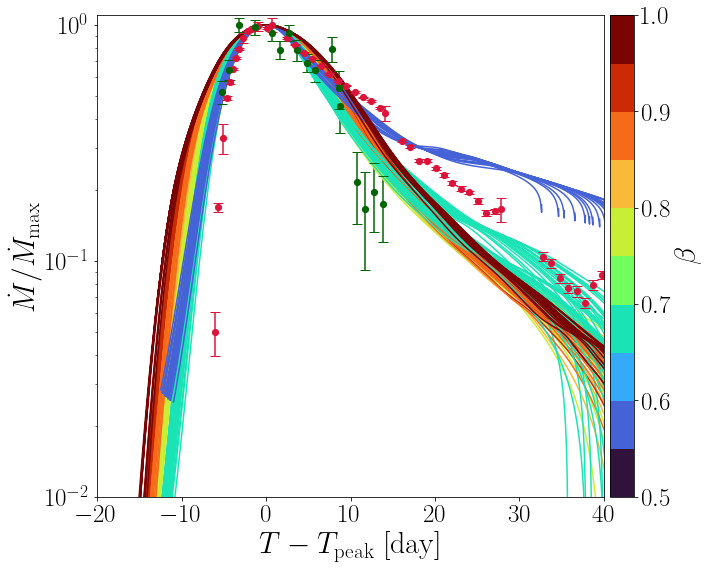

In [19]:
James_library('../../MOSFiT/mosfit/models/tde/data/4-3/', q=10**7.86)

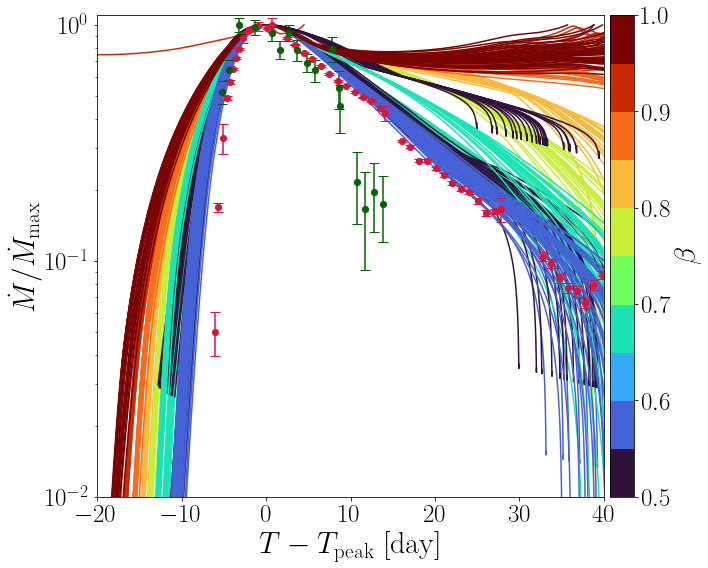

In [20]:
James_library('../../MOSFiT/mosfit/models/tde/data/5-3/', q=10**7.86)

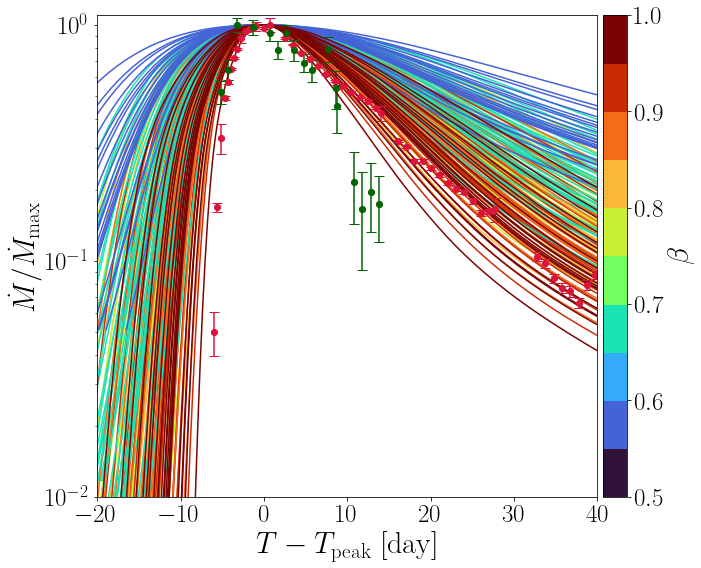

In [21]:
James_library('../../MOSFiT/mosfit/models/tde/data/4-3/', Period=1e20)

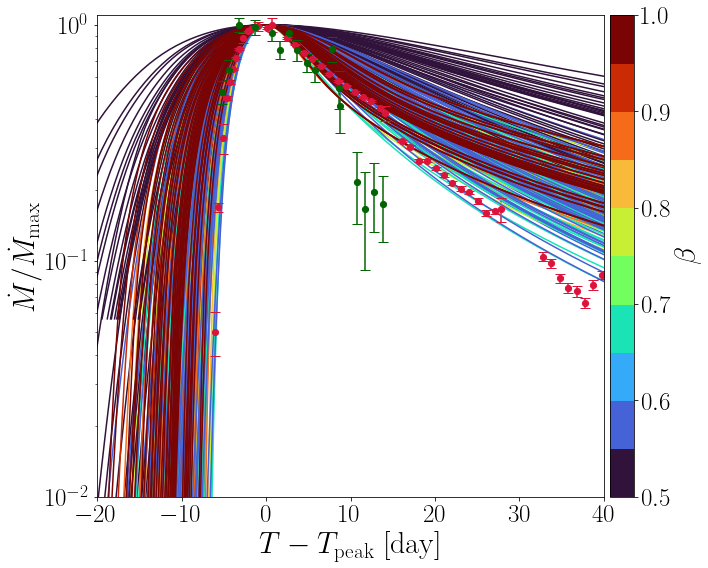

In [22]:
James_library('../../MOSFiT/mosfit/models/tde/data/5-3/', Period=1e20, q=3e5)